# Corpus Stufenstatistiken

<img src="res/dakoda-logo.png" width="200">

In [4]:
from dakoda.corpus import DakodaCorpus
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl


/Users/zesch/git/dakoda/analysis-recipes/.venv/lib/python3.11/site-packages/xsdata/formats/converter.py:83: ConverterWarning: Failed to convert value `` to one of (<enum 'DkdTrgLang'>,)
  warnings.warn(
/Users/zesch/git/dakoda/analysis-recipes/.venv/lib/python3.11/site-packages/xsdata/formats/converter.py:83: ConverterWarning: Failed to convert value `['notApplicable']` to one of (<enum 'ProficiencyAssignmentMethod'>,)
  warnings.warn(
/Users/zesch/git/dakoda/analysis-recipes/.venv/lib/python3.11/site-packages/xsdata/formats/converter.py:83: ConverterWarning: Failed to convert value `` to one of (<enum 'DkdTrgLang'>,)
  warnings.warn(
/Users/zesch/git/dakoda/analysis-recipes/.venv/lib/python3.11/site-packages/xsdata/formats/converter.py:83: ConverterWarning: Failed to convert value `['notApplicable']` to one of (<enum 'ProficiencyAssignmentMethod'>,)
  warnings.warn(
/Users/zesch/git/dakoda/analysis-recipes/.venv/lib/python3.11/site-packages/xsdata/formats/converter.py:83: ConverterWar

<Axes: xlabel='Stage', ylabel='Count'>

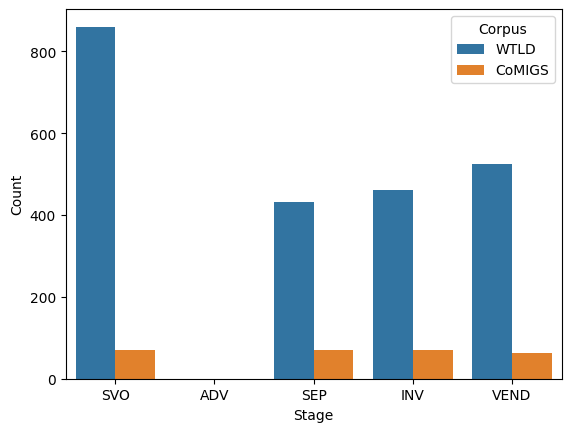

In [ ]:
from dakoda.query import annotation, count, eq, view

def count_stages(corpus, stage_value):
    """ Count documents in the corpus that have at least one annotation with the given stage_value."""
    q = count(view('learner') & annotation('Stage') & eq(stage_value), 'gt', 0)
    return len(list(corpus[q]))

wtld = DakodaCorpus("data/WTLD")
comigs = DakodaCorpus("data/CoMIGS")

rows = []
for corpus in [wtld, comigs]:
    for stage in ['SVO', 'ADV', 'SEP', 'INV', 'VEND']:
        rows.append({'Corpus': corpus.name,
                     'Stage': stage,
                     'Count': count_stages(corpus, stage)})

df = pl.DataFrame(rows)

sns.barplot(data=df,
            x='Stage',
            y='Count',
            hue='Corpus')